In [20]:
from utils import (
    get_areas, 
    get_specimen_ids, 
    get_trials,
    get_units_count,
    get_summary_df,
    load_memmap,
    load_index
)

from neural_maps import (
    sim_corrected_source_pair, 
    pls_corrected_single_source_to_B,
    sim_corrected_model_to_B,
    pls_corrected_model_to_B
)

from mapping import (
    compute_all_layer_scores,
    compute_area_scores
)

from alex_extractor import build_alexnet_design_matrices_with_dataloader

from plotter import plot_cka_comparison

import itertools
import pandas as pd
import json
import os

IMAGE_FOLDER = "../Preproc2/images/"


# Passing the stimuli to AlexNet and extracting activations

The idea is to use a pretrained model (AlexNet) to extract features from the stimuli images, and then use these features to predict neural responses. 

Using the formalism discussed in the [neural_to_neural.ipynb](neural_to_neural.ipynb) notebook, we can think of the model as a "source" and the neural data as a "target". We will compute the similarity between the model's representation and the neural representation using the same metrics as before (RSA, CKA, PLS).

Here the design matrices of the AlexNet representation do not have trials, to the splits (required for the reliability computation in the corrected similarity version) are performed only on the neural data.

In [18]:
index_model_random = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=4,
    weights="random",
    device="cpu",
    amp=True,
    layers_keep=["conv1", "conv2", "conv3", "conv4", "conv5"],
    save_dir="alex-random-matrices",
    return_in_memory=False
)

/home/giovanni/Desktop/mice-representation/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/giovanni/Desktop/mice-representation/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [21]:
index_model_inet = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=4,
    weights="imagenet",
    device="cpu",
    amp=True,
    layers_keep=["conv1", "conv2", "conv3", "conv4", "conv5"],
    save_dir="alex-matrices-inet",
    return_in_memory=False
)

# Loading the index file with paths to neural data

In [22]:
index_df = pd.read_csv('../Preproc2/data/combined_index.csv')

In [23]:
layer_scores_random_cka, median_scores_random_cka = compute_area_scores(index_model_random, index_df, sim_metric='CKA')
layer_scores_inet_cka, median_scores_inet_cka = compute_area_scores(index_model_inet, index_df, sim_metric='CKA')

Layer: conv1, Area: VISal, Specimen: 726141251, Score: 0.0708
Layer: conv1, Area: VISal, Specimen: 733457989, Score: 0.0555
Layer: conv1, Area: VISal, Specimen: 735109609, Score: 0.1668
Layer: conv1, Area: VISal, Specimen: 757329624, Score: 0.1656
Layer: conv1, Area: VISam, Specimen: 730756780, Score: 0.1611
Layer: conv1, Area: VISam, Specimen: 730760270, Score: 0.0930
Layer: conv1, Area: VISam, Specimen: 732548380, Score: 0.1239
Layer: conv1, Area: VISam, Specimen: 734865738, Score: 0.1849
Layer: conv1, Area: VISam, Specimen: 742602892, Score: 0.1168
Layer: conv1, Area: VISl, Specimen: 703279284, Score: 0.1229
Layer: conv1, Area: VISl, Specimen: 717038288, Score: 0.0871
Layer: conv1, Area: VISl, Specimen: 733457989, Score: 0.1132
Layer: conv1, Area: VISl, Specimen: 739783171, Score: 0.0836
Layer: conv1, Area: VISl, Specimen: 769360779, Score: 0.1325
Layer: conv1, Area: VISl, Specimen: 772616823, Score: 0.0834
Layer: conv1, Area: VISl, Specimen: 776061251, Score: 0.1974
Layer: conv1, A

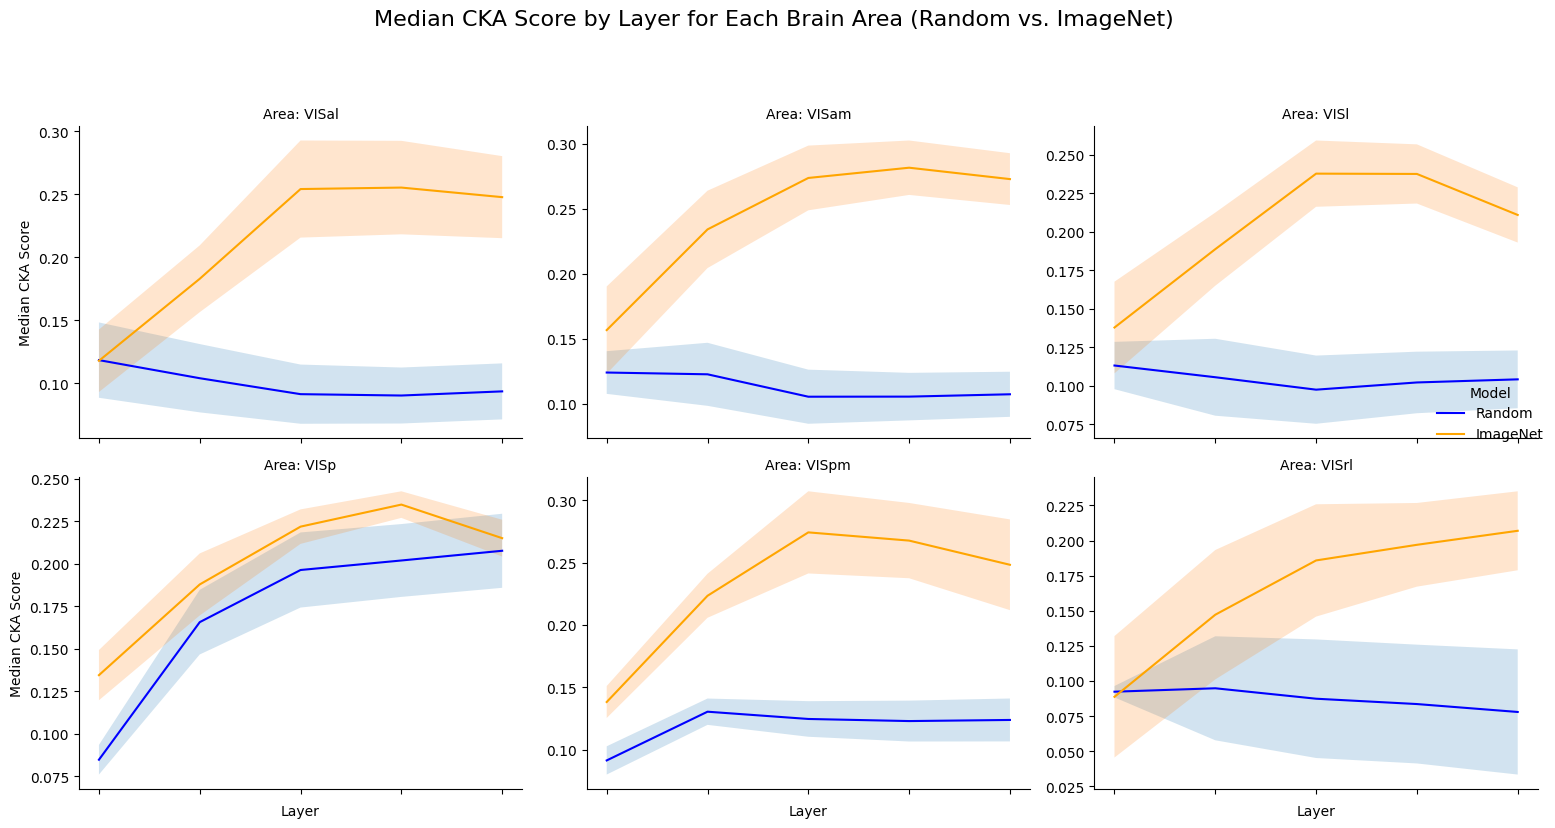

In [24]:
plot_cka_comparison(median_scores_random_cka, median_scores_inet_cka, metric_name='CKA')

Layer: conv1, Area: VISal, Specimen: 726141251, Score: 0.0766
Layer: conv1, Area: VISal, Specimen: 733457989, Score: 0.0642
Layer: conv1, Area: VISal, Specimen: 735109609, Score: 0.1911
Layer: conv1, Area: VISal, Specimen: 757329624, Score: 0.1904
Layer: conv1, Area: VISam, Specimen: 730756780, Score: 0.2102
Layer: conv1, Area: VISam, Specimen: 730760270, Score: 0.1351
Layer: conv1, Area: VISam, Specimen: 732548380, Score: 0.1687
Layer: conv1, Area: VISam, Specimen: 734865738, Score: 0.2372
Layer: conv1, Area: VISam, Specimen: 742602892, Score: 0.1025
Layer: conv1, Area: VISl, Specimen: 703279284, Score: 0.2621
Layer: conv1, Area: VISl, Specimen: 717038288, Score: 0.0929
Layer: conv1, Area: VISl, Specimen: 733457989, Score: 0.1474
Layer: conv1, Area: VISl, Specimen: 739783171, Score: 0.1087
Layer: conv1, Area: VISl, Specimen: 769360779, Score: 0.1972
Layer: conv1, Area: VISl, Specimen: 772616823, Score: 0.1209
Layer: conv1, Area: VISl, Specimen: 776061251, Score: 0.2152
Layer: conv1, A

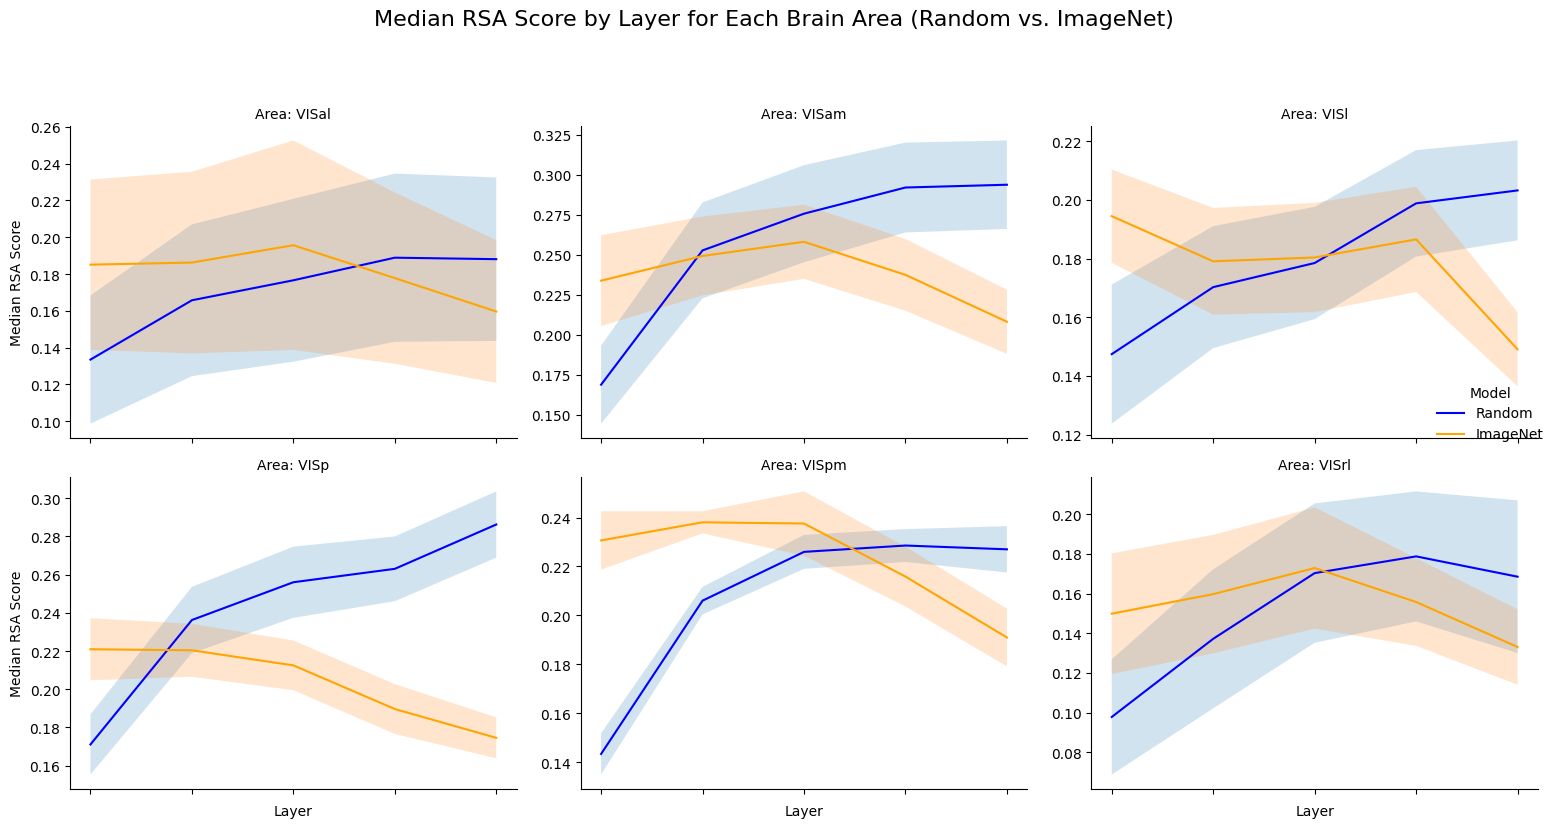

In [25]:
layer_scores_random_rsa, median_scores_random_rsa = compute_area_scores(index_model_random, index_df, sim_metric='RSA')
layer_scores_inet_rsa, median_scores_inet_rsa = compute_area_scores(index_model_inet, index_df, sim_metric='RSA')
plot_cka_comparison(median_scores_random_rsa, median_scores_inet_rsa, metric_name='RSA')

In [ ]:
layer_scores_random_pls, median_scores_random_pls = compute_area_scores(index_model_random, index_df, sim_metric='PLS')
layer_scores_inet_pls, median_scores_inet_pls = compute_area_scores(index_model_inet, index_df, sim_metric='PLS')
plot_cka_comparison(median_scores_random_pls, median_scores_inet_pls, metric_name='PLS')